<a href="https://colab.research.google.com/github/DaoJing17/Machine-Learning/blob/main/qwer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
data_url = "https://raw.githubusercontent.com/DaoJing17/Machine-Learning/main/data.csv"
data = pd.read_csv(data_url, sep=r'\t', engine='python')


In [18]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [19]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]}

DASS_bins = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)]}

In [21]:
only_q = data.filter(regex='Q\d{1,2}A')

In [22]:
import seaborn as sn
def draw_freq_plot(df):
    cnt_num = [(df[df == i].sum(axis=1).sum())/(i) for i in range(1,5)]
    ax=sn.barplot(x = [0,1,2,3], y=cnt_num)
    ax.set_xlabel('Level')
    ax.set_ylabel('Frequency')

In [23]:
def sub(df):
    return df.subtract(1, axis=1)

In [24]:
dep = []
for i in DASS_keys["Depression"]:
    dep.append('Q'+str(i)+'A')

In [25]:
depression_q = only_q.filter(dep)

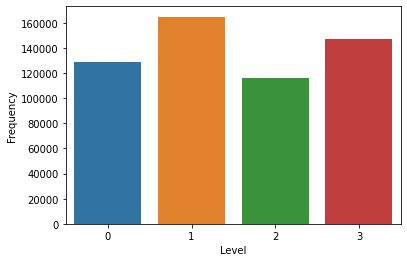

In [27]:
draw_freq_plot(depression_q)

In [28]:
depression_q = sub(depression_q)

In [29]:
depression_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q3A     39775 non-null  int64
 1   Q5A     39775 non-null  int64
 2   Q10A    39775 non-null  int64
 3   Q13A    39775 non-null  int64
 4   Q16A    39775 non-null  int64
 5   Q17A    39775 non-null  int64
 6   Q21A    39775 non-null  int64
 7   Q24A    39775 non-null  int64
 8   Q26A    39775 non-null  int64
 9   Q31A    39775 non-null  int64
 10  Q34A    39775 non-null  int64
 11  Q37A    39775 non-null  int64
 12  Q38A    39775 non-null  int64
 13  Q42A    39775 non-null  int64
dtypes: int64(14)
memory usage: 4.2 MB


In [30]:
depression_q.isnull().sum()

Q3A     0
Q5A     0
Q10A    0
Q13A    0
Q16A    0
Q17A    0
Q21A    0
Q24A    0
Q26A    0
Q31A    0
Q34A    0
Q37A    0
Q38A    0
Q42A    0
dtype: int64

In [31]:
depression_q.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2


In [32]:
def scores(df):
    col = list(df)
    df["Scores"] = df[col].sum(axis=1)
    return df

In [33]:
train_dep = scores(depression_q)

In [34]:
train_dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Scores
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


In [35]:
def append(df, string):
    conditions = [
    ((df['Scores'] >= DASS_bins[string][0][0])  & (df['Scores'] < DASS_bins[string][0][1])),
    ((df['Scores'] >= DASS_bins[string][1][0])  & (df['Scores'] < DASS_bins[string][1][1])),
    ((df['Scores'] >= DASS_bins[string][2][0])  & (df['Scores'] < DASS_bins[string][2][1])),
    ((df['Scores'] >= DASS_bins[string][3][0])  & (df['Scores'] < DASS_bins[string][3][1])),
    (((df['Scores'] >= DASS_bins[string][3][1])))
    ]
    values = ['Normal','Mild', 'Moderate', 'Severe', 'Extremely Severe']
    df['Category'] = np.select(conditions, values)
    return df
    
train_dep = append(train_dep, 'Depression')
train_dep.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Scores,Category
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,Extremely Severe


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
cat = train_dep['Category']
train_dep.drop('Category', inplace=True, axis=1)

In [37]:
Xtrain,Xtest,ytrain,ytest = train_test_split(train_dep, cat, train_size=0.75,random_state=2)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(29831, 15) (29831,) (9944, 15) (9944,)


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
 
    title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.grid(b=None)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.46198712791633145

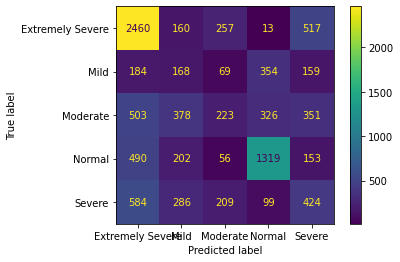

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
model_d = MultinomialNB(alpha=0.0001, fit_prior = False)
model_d.fit(Xtrain,ytrain)
plot_confusion_matrix(model_d, Xtest, ytest)
predictions = model_d.predict(Xtest)
f1_score(ytest,predictions, average = 'micro')